<a href="https://colab.research.google.com/github/ocallaghanm/2022_ML_EES/blob/main/OCallaghanM_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
!ln -sf /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'Colab Notebooks'   darknet   EarthEngine   MyDrive  'My Drive'


In [ ]:
# bash to clone Bochkovskiy repo with yolov4 implementation
# !git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15502, done.
remote: Total 15502 (delta 0), reused 0 (delta 0), pack-reused 15502
Receiving objects: 100% (15502/15502), 14.14 MiB | 28.62 MiB/s, done.
Resolving deltas: 100% (10406/10406), done.


In [ ]:
# libraries for the files in google drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1Vx8yZ_sDXYzilOfE7yh-ZUqLEUVYFLR3' 

In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [ ]:
# change directory to cloned repo
%cd darknet
# change makefile to have GPU and OPENCV enabled
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [ ]:
# make darknet exe
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

In [30]:
import matplotlib.pyplot as plt
import cv2
from google.colab import files

# define function to display example image after processing
def imShow(path):
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# define function to upload files to Colab
def upload():
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

In [ ]:
!ls

3rdparty	DarknetConfig.cmake.in	json_mjpeg_streams.sh  scripts
backup		darknet_images.py	LICENSE		       src
build		darknet.py		Makefile	       vcpkg.json
build.ps1	darknet_video.py	net_cam_v3.sh	       video_yolov3.sh
cfg		data			net_cam_v4.sh	       video_yolov4.sh
cmake		image_yolov3.sh		obj
CMakeLists.txt	image_yolov4.sh		README.md
darknet		include			results


In [ ]:
# Remove files in data dir
# ! rm -r data/*
# %cd data
# !ls # check

/content/darknet/data


In [ ]:
# upload() # 45 images

Saving 20201117_rotated__1pi2__image000036_horFlipped_channeled0.jpg to 20201117_rotated__1pi2__image000036_horFlipped_channeled0.jpg
Saving 20201117_rotated__1pi2__image000073_horFlipped_channeled0.jpg to 20201117_rotated__1pi2__image000073_horFlipped_channeled0.jpg
Saving 20201117_rotated__1pi2__image000395_channeled0.jpg to 20201117_rotated__1pi2__image000395_channeled0.jpg
Saving 20201117_rotated__1pi2__image000508_channeled0.jpg to 20201117_rotated__1pi2__image000508_channeled0.jpg
Saving 20201117_rotated__1pi2__image000508_channeled1.jpg to 20201117_rotated__1pi2__image000508_channeled1.jpg
Saving 20201117_rotated__1pi2__image000508_channeled2.jpg to 20201117_rotated__1pi2__image000508_channeled2.jpg
Saving 20201117_rotated__1pi2__image000509_channeled0.jpg to 20201117_rotated__1pi2__image000509_channeled0.jpg
Saving 20201117_rotated__1pi2__image000509_horFlipped_channeled0.jpg to 20201117_rotated__1pi2__image000509_horFlipped_channeled0.jpg
Saving 20201117_rotated__1pi2__image00

In [ ]:
upload() #upload corresponding label files

Saving 20201117_rotated__1pi2__image000036_horFlipped_channeled0.txt to 20201117_rotated__1pi2__image000036_horFlipped_channeled0.txt
Saving 20201117_rotated__1pi2__image000073_horFlipped_channeled0.txt to 20201117_rotated__1pi2__image000073_horFlipped_channeled0.txt
Saving 20201117_rotated__1pi2__image000395_channeled0.txt to 20201117_rotated__1pi2__image000395_channeled0.txt
Saving 20201117_rotated__1pi2__image000508_channeled0.txt to 20201117_rotated__1pi2__image000508_channeled0.txt
Saving 20201117_rotated__1pi2__image000508_channeled1.txt to 20201117_rotated__1pi2__image000508_channeled1.txt
Saving 20201117_rotated__1pi2__image000508_channeled2.txt to 20201117_rotated__1pi2__image000508_channeled2.txt
Saving 20201117_rotated__1pi2__image000509_channeled0.txt to 20201117_rotated__1pi2__image000509_channeled0.txt
Saving 20201117_rotated__1pi2__image000509_horFlipped_channeled0.txt to 20201117_rotated__1pi2__image000509_horFlipped_channeled0.txt
Saving 20201117_rotated__1pi2__image00

In [ ]:
# upload() # upload obj.names and obj.data

Saving obj.data.txt to obj.data.txt
Saving obj.names.txt to obj.names.txt
saved file obj.data.txt
saved file obj.names.txt


In [ ]:
# Rename obj.data and obj.names 
# !mv obj.data.txt obj.data
# !mv obj.names.txt obj.names

In [ ]:
!ls #check content of data/ folder

20201117_rotated__1pi2__image000036_horFlipped_channeled0.jpg
20201117_rotated__1pi2__image000036_horFlipped_channeled0.txt
20201117_rotated__1pi2__image000073_horFlipped_channeled0.jpg
20201117_rotated__1pi2__image000073_horFlipped_channeled0.txt
20201117_rotated__1pi2__image000395_channeled0.jpg
20201117_rotated__1pi2__image000395_channeled0.txt
20201117_rotated__1pi2__image000508_channeled0.jpg
20201117_rotated__1pi2__image000508_channeled0.txt
20201117_rotated__1pi2__image000508_channeled1.jpg
20201117_rotated__1pi2__image000508_channeled1.txt
20201117_rotated__1pi2__image000508_channeled2.jpg
20201117_rotated__1pi2__image000508_channeled2.txt
20201117_rotated__1pi2__image000509_channeled0.jpg
20201117_rotated__1pi2__image000509_channeled0.txt
20201117_rotated__1pi2__image000509_horFlipped_channeled0.jpg
20201117_rotated__1pi2__image000509_horFlipped_channeled0.txt
20201117_rotated__1pi2__image000510_channeled0.jpg
20201117_rotated__1pi2__image000510_channeled0.txt
20201117_rotated

In [ ]:
%cd data

/content/gdrive/MyDrive/darknet/data


In [ ]:
# Make list of all image files and corresponding labels
import os

imgset = []
txtset = []
for fname in os.listdir(os.getcwd()):
  if fname.endswith(".jpg"):
    imgset.append("data/" + fname)
  elif fname.endswith(".txt") and fname != 'train.txt' and fname != 'test.txt':
    txtset.append("data/" + fname)
assert len(imgset) == 45
assert len(txtset) == 45
txtset


['data/20201117_rotated__1pi2__image000073_horFlipped_channeled0.txt',
 'data/20201117_rotated__1pi2__image000508_channeled1.txt',
 'data/20201117_rotated__1pi2__image000510_channeled0.txt',
 'data/20201117_rotated__1pi2__image000516_channeled1.txt',
 'data/20201117_rotated__1pi2__image000519_horFlipped_channeled3.txt',
 'data/20201117_rotated__1pi2__image000522_channeled0.txt',
 'data/20201117_rotated__1pi2__image000523_horFlipped_channeled0.txt',
 'data/20201117_rotated__1pi2__image000525_channeled0.txt',
 'data/20201117_rotated__1pi2__image000527_channeled0.txt',
 'data/20201117_rotated__1pi2__image000036_horFlipped_channeled0.txt',
 'data/20201117_rotated__1pi2__image000395_channeled0.txt',
 'data/20201117_rotated__1pi2__image000508_channeled0.txt',
 'data/20201117_rotated__1pi2__image000508_channeled2.txt',
 'data/20201117_rotated__1pi2__image000509_channeled0.txt',
 'data/20201117_rotated__1pi2__image000509_horFlipped_channeled0.txt',
 'data/20201117_rotated__1pi2__image000510_ho

In [ ]:
# Split imgset into a training and test set. TheAIGuy's code does not cater for validation sets.
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(imgset, test_size = 0.2, random_state = 12)

y_train = []
for inst in X_train:
  for lab in txtset:
    if lab[:-3] == inst[:-3]:
      y_train.append(lab)

In [ ]:
y_test = []
for inst in X_test:
  for lab in txtset:
    if lab[:-3] == inst[:-3]:
      y_test.append(lab)

In [ ]:
assert len(X_test) == len(y_test)
assert len(X_train) == len(y_train)

In [ ]:
len(X_train)

36

In [ ]:
X_train

['data/20201117_rotated__1pi2__image000520_channeled0.jpg',
 'data/20201117_rotated__1pi2__image000509_horFlipped_channeled0.jpg',
 'data/20201117_rotated__1pi2__image000519_horFlipped_channeled2.jpg',
 'data/20201117_rotated__1pi2__image000516_horFlipped_channeled1.jpg',
 'data/20201117_rotated__1pi2__image000036_horFlipped_channeled0.jpg',
 'data/20201117_rotated__1pi2__image000531_channeled1.jpg',
 'data/20201117_rotated__1pi2__image000523_horFlipped_channeled1.jpg',
 'data/20201117_rotated__1pi2__image000531_channeled0.jpg',
 'data/20201117_rotated__1pi2__image000513_channeled0.jpg',
 'data/20201117_rotated__1pi2__image000516_horFlipped_channeled0.jpg',
 'data/20201117_rotated__1pi2__image000519_horFlipped_channeled0.jpg',
 'data/20201117_rotated__1pi2__image000522_horFlipped_channeled0.jpg',
 'data/20201117_rotated__1pi2__image000508_channeled1.jpg',
 'data/20201117_rotated__1pi2__image000519_channeled0.jpg',
 'data/20201117_rotated__1pi2__image000519_horFlipped_channeled3.jpg',
 

In [ ]:
# Write train and test txt files
with open("train.txt", "w") as outfile:
    for image in X_train:
        outfile.write(image[:5] + 'obj/' + image[5:])
        outfile.write("\n")
    outfile.close()
with open("test.txt", "w") as outfile:
    for image in X_test:
        outfile.write(image[:5] + 'test/' + image[5:])
        outfile.write("\n")
    outfile.close()

In [ ]:
# %cd data
! mkdir obj # make subfolder for training set
! mkdir test # make subfolder for test set

In [ ]:
# Move train set to data/obj
import shutil 

for fname in X_train:
  for sourcef in os.listdir():
    if sourcef == fname[5:]:
      dest = 'obj/' + sourcef
      shutil.move(sourcef, dest)

In [ ]:
# Same for test set to data/test
for fname in X_test:
  for sourcef in os.listdir():
    if sourcef == fname[5:]:
      dest = 'test/' + sourcef
      shutil.move(sourcef, dest)

In [ ]:
# Same for labels
for fname in y_train:
  for sourcef in os.listdir():
    if sourcef == fname[5:]:
      dest = 'obj/' + sourcef
      shutil.move(sourcef, dest)

In [ ]:
for fname in y_test:
  for sourcef in os.listdir():
    if sourcef == fname[5:]:
      dest = 'test/' + sourcef
      shutil.move(sourcef, dest)

In [ ]:
# upload adapted yolov4.cfg
upload()

Saving yolov4-custom.cfg to yolov4-custom.cfg
saved file yolov4-custom.cfg


In [ ]:
!ls

obj  obj.data  obj.names  test	yolov4.cfg


In [ ]:
%cd ../../
!ls

/
bin	 dev   lib32  mydrive			python-apt  srv    usr
boot	 etc   lib64  NGC-DL-CONTAINER-LICENSE	root	    sys    var
content  home  media  opt			run	    tmp
datalab  lib   mnt    proc			sbin	    tools


In [ ]:
%pwd
%cd /content/
!ls

/content
darknet  gdrive  sample_data


In [ ]:
!cp -r darknet /mydrive/darknet # copy current state of folder to GDrive

In [ ]:
%cd darknet

/content/darknet


In [ ]:
%pwd

'/content/darknet'

In [ ]:
!find ./darknet
!find data/obj.data
!find yolov4-custom.cfg

./darknet
data/obj.data
yolov4-custom.cfg


In [ ]:
!ls

 3rdparty		  darknet_images.py	  net_cam_v4.sh
 backup			  darknet.py		  obj
 bad.list		  darknet_video.py	  README.md
 build			  data			  results
 build.ps1		  image_yolov3.sh	  scripts
 cfg			  image_yolov4.sh	  src
 chart.png		  include		  vcpkg.json
 chart_yolov4-obj.png	  json_mjpeg_streams.sh   video_yolov3.sh
 cmake			  LICENSE		  video_yolov4.sh
 CMakeLists.txt		  Makefile		  yolov4.conv.137
 darknet		 'My Drive'		  yolov4-obj.cfg
 DarknetConfig.cmake.in   net_cam_v3.sh


In [ ]:
# %cd mydrive/darknet # when reloading 

[Errno 2] No such file or directory: './mydrive/darknet # when reloading'
/content/gdrive/MyDrive/darknet


In [ ]:
# Check GPU availability
!nvidia-smi

Wed Dec 14 14:00:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P0    28W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [17]:
!chmod -R 777 darknet

In [ ]:
%cd data

/content/gdrive/MyDrive/darknet/data


In [3]:
# Reduce dataset by selecting 20 random pics in training and 5 random pics in test
import random
random.seed(12)
rnd_train = random.sample(range(36), 20)
rnd_test = random.sample(range(9), 5)

In [8]:
%cd /content/gdrive/MyDrive/darknet

/content/gdrive/MyDrive/darknet


In [13]:
with open('data/train.txt') as f:
  lines = f.readlines()
  trainlines = []
  for idx in rnd_train:
    trainlines.append(lines[idx])
  f.close()
with open("data/train_red.txt", "w") as outfile:
    for line in trainlines:
        outfile.write(line)
        outfile.write("\n")
    outfile.close()

In [15]:
with open('data/test.txt') as f:
  lines = f.readlines()
  testlines = []
  for idx in rnd_test:
    testlines.append(lines[idx])
  f.close()
with open("data/test_red.txt", "w") as outfile:
    for line in testlines:
        outfile.write(line)
        outfile.write("\n")
    outfile.close()

In [20]:
# YOLOV4-tiny
# Train with pretrained weights yolov4-tiny.conv.29 (Bochkovskiy)
!./darknet detector train data/obj.data yolov4-tiny-obj.cfg yolov4-tiny.conv.29 -dont_show -map

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.836817), count: 4, class_loss = 0.016236, iou_loss = 6.920179, total_loss = 6.936415 
 total_bbox = 214490, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.880277), count: 4, class_loss = 0.000101, iou_loss = 5.776413, total_loss = 5.776515 
 total_bbox = 214494, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.000000), count: 1, class_loss = 0.000001, iou_loss = 0.000000, tot

In [ ]:
# killed training after 3505 iterations

 CUDA-version: 11020 (11020), cuDNN: 8.1.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Cannot load image data/labels/32_0.png
Cannot load image data/labels/33_0.png
Cannot load image data/labels/34_0.png
Cannot load image data/labels/35_0.png
Cannot load image data/labels/36_0.png
Cannot load image data/labels/37_0.png
Cannot load image data/labels/38_0.png
Cannot load image data/labels/39_0.png
Cannot load image data/labels/40_0.png
Cannot load image data/labels/41_0.png
Cannot load image data/labels/42_0.png
Cannot load image data/labels/43_0.png
Cannot load image data/labels/44_0.png
Cannot load image data/labels/45_0.png
Cannot load image data/labels/46_0.png
Cannot load image data/labels/47_0.png
Cannot load image data/labels/48_0.png
Cannot load image data/labels/49_0.png
Cannot load image data/labels/50_0.png
Cannot load image data/labels/51_0.png
Cannot load image data/labels/52_0.png
Cannot load image data/labels/53_0.png
Cannot load image data/labels/5

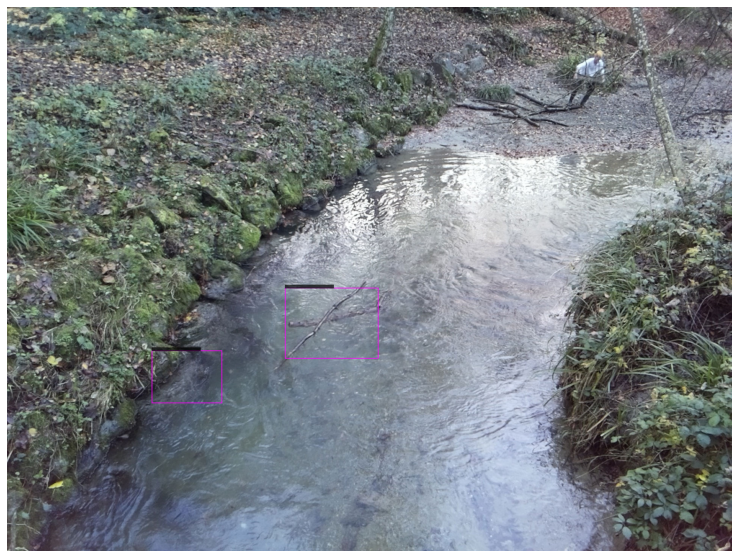

In [31]:
# YOLOv4-tiny
# Test using best weights
!./darknet detector test data/obj.data yolov4-tiny-obj.cfg backup/yolov4-tiny-obj_best.weights 20201117_rotated__1pi2__image002594.jpg -thresh 0.3
imShow('predictions.jpg')

In [ ]:
# YOLOv7 tiny
!./darknet detector train data/obj.data yolov7-tiny-obj.cfg  -dont_show -map

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
v3 (iou loss, Normalizer: (iou: 0.05, obj: 1.00, cls: 0.50) Region 98 Avg (IOU: 0.000000), count: 1, class_loss = 0.011614, iou_loss = 0.000000, total_loss = 0.011614 
 total_bbox = 902080, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.05, obj: 1.00, cls: 0.50) Region 90 Avg (IOU: 0.900543), count: 11, class_loss = 0.147737, iou_loss = 14.152359, total_loss = 14.300097 
v3 (iou loss, Normalizer: (iou: 0.05, obj: 1.00, cls: 0.50) Region 94 Avg (IOU: 0.876578), count: 3, class_loss = 0.350643, iou_loss = 3.092068, total_loss = 3.442711 
v3 (iou loss, Normalizer: (iou: 0.05, obj: 1.00, cls: 0.50) Region 98 Avg (IOU: 0.000000), count: 1, class_loss = 0.003151, iou_loss = 0.000000, total_loss = 0.003151 
 total_bbox = 902094, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.05, obj: 1.00, cls: 0.50) Region 90 Avg (IOU: 0.848823), count: 9, class_loss = 1.058051, iou_loss = 8.469586, 

In [ ]:
# YOLOv7-tiny
# Test on same image as YOLOv4 using best weights
!./darknet detector test data/obj.data yolov7-tiny-obj.cfg backup/yolov7-tiny-obj_best.weights 20201117_rotated__1pi2__image002594.jpg -thresh 0.3
imShow('predictions.jpg')